These are the quaternions of the rotation of the camera respected to the ego car. 
You can use the pyquaternion library to convert it to yaw_pitch_roll.

[1.28400265 0.31639086 1.67877024]
[ 1.50612211 -0.03602647  1.69421848]
[ 1.27320628 -0.31664681  1.68114556]
[1.04338732 0.31565584 1.66400371]
[ 0.81558292 -0.00559198  1.65395645]
[ 1.04116266 -0.31121292  1.66718288]

The original image size is 1224 * 1024.

These are the translation the cameras respected to the ego car

[1.28400265 0.31639086 1.67877024]
[ 1.50612211 -0.03602647  1.69421848]
[ 1.27320628 -0.31664681  1.68114556]
[1.04338732 0.31565584 1.66400371]
[ 0.81558292 -0.00559198  1.65395645]
[ 1.04116266 -0.31121292  1.66718288]

In [45]:
!pwd

/Users/mintielaptop/Dropbox/NYU_Data_Science/Deep Learning/project/DLSP20Dataset/code


In [1]:
import numpy as np
import pandas as pd

In [2]:
#in this case the matrix is transpose of the typical structure


intrinsics_big = {
    'CAM_FRONT_LEFT': 
              np.array([[879.03824732, 0.0,          613.17597314],
                [0.0,         879.03824732, 524.14407205],
                [0.0,         0.0,          4.0]]),
'CAM_FRONT': 
              np.array([[882.61644117, 0.0, 621.63358525],
                [0.0, 882.61644117, 524.38397862],
                [0.0, 0.0, 4.0]]),
'CAM_FRONT_RIGHT': 
    np.array([[880.41134027, 0.0, 618.9494972],
    [0.0, 880.41134027, 521.38918482],
    [0.0, 0.0, 4.0]]),
    
'CAM_BACK_LEFT': 
        np.array([[881.28264688, 0.0, 612.29732111],
    [0.0, 881.28264688, 521.77447199],
    [0.0, 0.0, 4.0]]),
'CAM_BACK': 
    np.array([[882.93018422, 0.0, 616.45479905],
    [0.0, 882.93018422, 528.27123027],
    [0.0, 0.0, 4.0]]),
'CAM_BACK_RIGHT': 
    np.array([[881.63835671, 0.0, 607.66308183],
    [0.0, 881.63835671, 525.6185326],
    [0.0, 0.0, 4.0]])}

In [3]:
image_names = [
    'CAM_FRONT_LEFT',
    'CAM_FRONT',
    'CAM_FRONT_RIGHT',
    'CAM_BACK_LEFT',
    'CAM_BACK',
    'CAM_BACK_RIGHT'
]

In [4]:
#need to scale all intrinsic values down by a factor of 4 beause Jason shrink the image
intrinsics = {}
for cam in image_names:
    intrinsics[cam] = intrinsics_big[cam]/4


In [47]:
intrinsics

{'CAM_FRONT_LEFT': array([[219.75956183,   0.        , 153.29399328],
        [  0.        , 219.75956183, 131.03601801],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_FRONT': array([[220.65411029,   0.        , 155.40839631],
        [  0.        , 220.65411029, 131.09599465],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_FRONT_RIGHT': array([[220.10283507,   0.        , 154.7373743 ],
        [  0.        , 220.10283507, 130.3472962 ],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_BACK_LEFT': array([[220.32066172,   0.        , 153.07433028],
        [  0.        , 220.32066172, 130.443618  ],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_BACK': array([[220.73254606,   0.        , 154.11369976],
        [  0.        , 220.73254606, 132.06780757],
        [  0.        ,   0.        ,   1.        ]]),
 'CAM_BACK_RIGHT': array([[220.40958918,   0.        , 151.91577046],
        [  0.        , 220.40958918, 131.40463315],
        [

In [49]:
int(round(151.91577046))

152

In [ ]:
#looks like all the princpal points are C_u = int(round(intrinsic[0][2])), C_v = int(round(intrinsic[1][2]))

In [5]:
quaternion = {
'CAM_FRONT_LEFT': 
np.array([ 0.68316462, -0.68338771,  0.17581486, -0.18799863]),
 'CAM_FRONT':   
np.array([ 0.50745829, -0.49812866,  0.49496606, -0.49934369]),
 'CAM_FRONT_RIGHT':   
np.array([-0.19470424,  0.17808752, -0.68312934,  0.68095909]),
'CAM_BACK_LEFT': 
np.array([-0.67797289,  0.6871698,   0.19201452, -0.1768143 ]),
'CAM_BACK':    
np.array([-0.49033062,  0.50741961,  0.50819262, -0.49379061]),
'CAM_BACK_RIGHT':    
np.array([-0.17126042,  0.1897148,   0.68851343, -0.6786766 ]) }

In [6]:
translation = {
    'CAM_FRONT_LEFT': 
    [1.28400265, 0.31639086, 1.67877024],
    'CAM_FRONT':  
[ 1.50612211, -0.03602647,  1.69421848],
    'CAM_FRONT_RIGHT': 
[ 1.27320628, -0.31664681,  1.68114556],
    'CAM_BACK_LEFT':
[1.04338732, 0.31565584, 1.66400371],
    'CAM_BACK':
[ 0.81558292, -0.00559198,  1.65395645],
    'CAM_BACK_RIGHT':
[ 1.04116266, -0.31121292,  1.66718288]
    

    
}

In [7]:
#referr to https://en.wikipedia.org/wiki/Quaternions_and_spatial_rotation 
#Quaternion-derived rotation matrix
#scipy implementation
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.transform.Rotation.html
 
from scipy.spatial.transform import Rotation as R    
    

In [8]:
def gen_ex_matrix (quat, trans):
    assert len(quat) == 4
    r = R.from_quat(quat)
    
    m = r.as_matrix()
    trans = np.expand_dims(trans, axis = 1)
    res = np.concatenate((m, trans), axis =1)
    
    return res
    

In [ ]:
def gen_p_inv_matrix(int_matrix, ex_matrix):
    return np.linalg.pinv(int_matrix.dot(ex_matrix))

In [21]:
extrinsics = {}
inv_matrix = {}

for cam in image_names:
    extrinsics[cam] = gen_ex_matrix(quaternion[cam], translation[cam])
    inv_matrix[cam] = gen_p_inv_matrix(intrinsics[cam], extrinsics[cam])


In [22]:
inv_matrix

{'CAM_FRONT_LEFT': array([[ 3.74711399e-04, -4.46204781e-03,  6.12783804e-01],
        [-1.90449152e-03,  5.25128939e-04,  3.13148666e-01],
        [ 3.11532389e-03,  2.85569251e-04, -1.13739756e+00],
        [ 1.04952829e-03,  2.58614075e-04,  1.06781371e-01]]),
 'CAM_FRONT': array([[-9.97649276e-06, -4.52977105e-03,  5.82333512e-01],
        [ 1.85093209e-03, -6.82850174e-05, -8.06553714e-01],
        [ 2.87907577e-03,  1.01512838e-04, -8.82143241e-01],
        [ 1.11166588e-03, -2.65910693e-05,  1.06651616e-01]]),
 'CAM_FRONT_RIGHT': array([[-3.60835562e-04, -4.44866065e-03,  5.50043397e-01],
        [ 3.65714895e-03,  2.17631884e-05, -1.15125922e+00],
        [ 1.33730694e-04,  6.40683025e-04,  1.23907585e-01],
        [ 1.04272637e-03, -2.59326383e-04,  1.75495554e-01]]),
 'CAM_BACK_LEFT': array([[ 2.64725237e-04, -4.43238059e-03,  6.42275221e-01],
        [-3.86264690e-03,  4.91950567e-05,  1.10901262e+00],
        [-4.17206289e-04,  6.74562516e-04, -2.31670286e-01],
        [ 9.

In [189]:
image_names

['CAM_FRONT_LEFT',
 'CAM_FRONT',
 'CAM_FRONT_RIGHT',
 'CAM_BACK_LEFT',
 'CAM_BACK',
 'CAM_BACK_RIGHT']

In [202]:
rot_matrix = {}

angles = [60, 0, 300, 120, 180, 240]
for i, cam in enumerate(image_names):
     
    rad = math.radians(angles[i])
    R = np.array([[math.cos(rad), -math.sin(rad)], [math.sin(rad), math.cos(rad)]])
    rot_matrix[cam] = R
# to convert camera to front camera axis do R.dot((Xw_cam, Zw_cam))

60
0
300
120
180
240


In [195]:
math.radians(180)

3.141592653589793

In [196]:
math.cos(math.radians(180))

-1.0

In [203]:
rot_matrix

{'CAM_FRONT_LEFT': array([[ 0.5      , -0.8660254],
        [ 0.8660254,  0.5      ]]),
 'CAM_FRONT': array([[ 1., -0.],
        [ 0.,  1.]]),
 'CAM_FRONT_RIGHT': array([[ 0.5      ,  0.8660254],
        [-0.8660254,  0.5      ]]),
 'CAM_BACK_LEFT': array([[-0.5      , -0.8660254],
        [ 0.8660254, -0.5      ]]),
 'CAM_BACK': array([[-1.0000000e+00, -1.2246468e-16],
        [ 1.2246468e-16, -1.0000000e+00]]),
 'CAM_BACK_RIGHT': array([[-0.5      ,  0.8660254],
        [-0.8660254, -0.5      ]])}

In [204]:
R= rot_matrix["CAM_BACK"]
R.dot(np.array([1, 1]))

array([-1., -1.])

In [205]:
#emperically figure out s-value for each camera

s_val ={
    
    'CAM_FRONT_LEFT': 3.571428571428571 ,
 'CAM_FRONT': 3.745318352059925,
 'CAM_FRONT_RIGHT':  3.236245954692557,
 'CAM_BACK_LEFT': 3.1847133757961785 ,
 'CAM_BACK':  2.7027027027027026,
 'CAM_BACK_RIGHT':2.8490028490028494
    
}

In [206]:
cam = 'CAM_FRONT_LEFT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])/0.28
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 1.285661  ,  1.27106337,  1.25646574],
       [ 0.24793682,  0.24301052,  0.23808423],
       [-2.35621668, -2.34407063, -2.33192459],
       [ 0.99609429,  1.00076622,  1.00543816]])

In [207]:
#can we get back
intrinsics[cam].dot(extrinsics[cam].dot(world_dim))

array([[525.        , 528.57142857, 532.14285714],
       [246.42857143, 250.        , 253.57142857],
       [  3.57142857,   3.57142857,   3.57142857]])

In [208]:
cam_u_v

array([[525.        , 528.57142857, 532.14285714],
       [246.42857143, 250.        , 253.57142857],
       [  3.57142857,   3.57142857,   3.57142857]])

In [209]:
#okay it works

In [210]:
1/0.28

3.571428571428571

In [211]:
cam = 'CAM_FRONT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 1.00499145,  0.98798865,  0.97098585],
       [-2.03325928, -2.0265827 , -2.01990612],
       [-1.71413059, -1.70296734, -1.69180409],
       [ 0.99628608,  1.00035003,  1.00441398]])

In [212]:
 1/0.267

3.745318352059925

In [213]:
cam = 'CAM_FRONT_RIGHT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 0.18631599,  0.1815065 ,  0.176697  ],
       [-0.6194492 , -0.61577029, -0.61209138],
       [ 0.18814635,  0.18892076,  0.18969518],
       [ 0.30853803,  0.30932143,  0.31010483]])

In [214]:
1/0.309

3.236245954692557

In [215]:
cam = 'CAM_BACK_LEFT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 0.37092319,  0.36675553,  0.36258788],
       [ 0.54464718,  0.54083373,  0.53702028],
       [-0.24578023, -0.24552288, -0.24526552],
       [ 0.31240168,  0.31364602,  0.31489037]])

In [216]:
1/.314

3.1847133757961785

In [217]:
cam = 'CAM_BACK'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[0.29975401, 0.29509623, 0.29043845],
       [0.38684136, 0.38549058, 0.3841398 ],
       [0.33040936, 0.32669805, 0.32298673],
       [0.36938924, 0.37022308, 0.37105692]])

In [218]:
1/0.370

2.7027027027027026

In [219]:
cam = 'CAM_BACK_RIGHT'
C_u = int(round(intrinsics[cam][0][2])), 
C_v = int(round(intrinsics[cam][1][2]))
uu = np.array([300, 301, 302]) - C_u
vv = np.array([200, 201, 202]) - C_v
cam_u_v = np.array([uu,vv,[1,1,1]])#/0.267
world_dim = inv_matrix[cam].dot(cam_u_v)
world_dim

array([[ 0.19080096,  0.18595685,  0.18111274],
       [-0.12576164, -0.12300252, -0.12024339],
       [ 0.54548027,  0.54275377,  0.54002726],
       [ 0.35013494,  0.35080259,  0.35147024]])

In [220]:
1/0.351

2.8490028490028494

In [221]:
#refer to this image https://docs.opencv.org/2.4/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html#void
#translate u, v ( col idx, row idx) in camera image to Xw, Yw, Zw in real world, and take Zw, Xw (col idx, row idx in BEV)
# for each camera, need to rotate Zw, Xw to CAM FRONT Xw, Zw so it's all in the same canonical 
# stitch together, resize if necessary



In [222]:
PATH = "/Users/mintielaptop/Dropbox/NYU_Data_Science/Deep Learning/scene_106_sample_0/"

In [223]:
#mapping
##each image size 256 (v, nrow), 306 (u, ncol)


In [224]:
def gen_cam_UV_m (cam, intrinsics, s_val):
    C_u = int(round(intrinsics[cam][0][2]))
    C_v = int(round(intrinsics[cam][1][2]))
    uu  = np.array(range(306)) - C_u
    vv = np.array(range(256)) - C_v
    #create all paris
    output = [[u, v, 1] for u in uu  
          for v in vv]
    
    result = np.array(output).T
    #result = result*s_val[cam]
    return result
    
 

In [225]:
306*256

78336

In [226]:
test_res = gen_cam_UV_m('CAM_FRONT_LEFT', intrinsics, s_val)

In [227]:
test_res.shape

(3, 78336)

In [228]:
def gen_world_dim (cam, cam_uv_m, inv_matrix):
    world_dim = inv_matrix[cam].dot(cam_uv_m)
    return world_dim

In [229]:
test_wdim = gen_world_dim('CAM_FRONT_LEFT', test_res, inv_matrix)

In [230]:
test_wdim #definitely some distortion there seeing the fourth row are not 1's 

array([[ 1.13998122,  1.13551918,  1.13105713, ...,  0.1253701 ,
         0.12090806,  0.11644601],
       [ 0.53574398,  0.53626911,  0.53679424, ...,  0.08773168,
         0.08825681,  0.08878194],
       [-1.65145169, -1.65116612, -1.65088055, ..., -0.62902888,
        -0.62874331, -0.62845774],
       [-0.0876749 , -0.08741629, -0.08715767, ...,  0.29786059,
         0.2981192 ,  0.29837782]])

In [231]:
test_wdim.shape

(4, 78336)

In [232]:
print(min(test_wdim[0]))

0.002159030847684096


In [233]:
print(max(test_wdim[0]))

1.2542681998263467


In [234]:
print(min(test_wdim[2]))

-1.6514516878398555


In [235]:
print(max(test_wdim[2]))

-0.628457742536753


In [236]:
test_wdim[0].shape

(78336,)

In [237]:
np.stack((test_wdim[0], test_wdim[2]), axis=0)

array([[ 1.13998122,  1.13551918,  1.13105713, ...,  0.1253701 ,
         0.12090806,  0.11644601],
       [-1.65145169, -1.65116612, -1.65088055, ..., -0.62902888,
        -0.62874331, -0.62845774]])

In [238]:
def gen_BEV_XZ (cam, wdim, rot_matrix):
    R = rot_matrix[cam]
    cam_XZ = np.stack((wdim[0], wdim[2]), axis=0)
    #R.dot((Xw_cam, Zw_cam))
    result = R.dot(cam_XZ)
    return result

In [239]:
bev_XZ = gen_BEV_XZ('CAM_FRONT_LEFT', test_wdim, rot_matrix)

In [240]:
bev_XZ

array([[ 2.00018973,  1.99771139,  1.99523306, ...,  0.60744004,
         0.60496171,  0.60248337],
       [ 0.16152686,  0.15780539,  0.15408393, ..., -0.20594075,
        -0.20966221, -0.21338367]])

In [241]:
print(min(bev_XZ[0]))

0.6024833740644007


In [242]:
print(max(bev_XZ[0]))

2.0001897263064667


In [243]:
print(min(bev_XZ[1]))

-0.7874459888510774


In [244]:
print(max(bev_XZ[1]))

0.7355891734330144


In [245]:
import matplotlib
import matplotlib.pyplot as plt

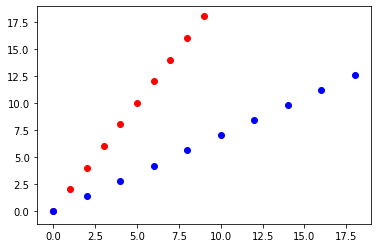

In [246]:
plt.scatter(np.arange(10), np.arange(10)*2, color = 'r')
plt.scatter(np.arange(10)*2, np.arange(10)*1.4, color = 'b')


(2, 78336)
(2, 78336)
(2, 78336)
(2, 78336)
(2, 78336)
(2, 78336)


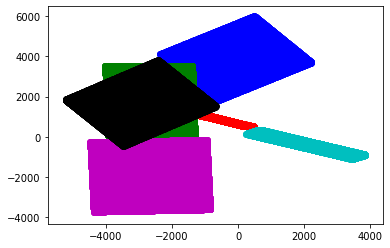

In [248]:
##put it all together
allCam_map_dict ={}
min_max_dict = {}
color_list = ['b', 'g', 'r', 'c', 'm', 'k']
 
for j, cam in enumerate(image_names):
    

    #allCam_map_dict[cam] = {}
    map_dict = {} 
    col_ind  = np.arange(306)
    row_ind = np.arange(256)
    all_cam_row_col = [(r,c) for r in row_ind for c in col_ind]
    row_col_ind_dict = {}
    for i, pair in enumerate(all_cam_row_col):
        row_col_ind_dict[pair] = i #use later to map from cam image (row, col) to BEV (row, col)
        
        
    #generate camera X_w, Y_w, Z_w
    test_res = gen_cam_UV_m(cam, intrinsics, s_val)
    test_wdim = gen_world_dim(cam, test_res, inv_matrix)
    
    #rotate Z_w, X_w into BEV Z_w, X_w
    bev_XZ = gen_BEV_XZ(cam, test_wdim, rot_matrix)
    print(bev_XZ.shape)
    #create the mapping 
    bev_X = bev_XZ[0]
    bev_Z = bev_XZ[1]
    for pair, ind in row_col_ind_dict.items():
    
        map_dict[pair] = (bev_X[ind], bev_Z[ind]) 
    allCam_map_dict[cam] = map_dict
    min_max_dict[cam] = [min(bev_X), max(bev_X), min(bev_Z), max(bev_Z)] 
    
    #plotting
    plt.scatter(bev_Z*3000, bev_X*3000, color = color_list[j])
    
    

In [177]:
min_max_dict #I have a feeling the X rows are flipped

{'CAM_FRONT_LEFT': [0.002159030847684096,
  1.2542681998263467,
  -1.6514516878398555,
  -0.628457742536753],
 'CAM_FRONT': [0.38862708252168343,
  1.7505846349730567,
  -0.6386906015509902,
  0.7851290831143167],
 'CAM_FRONT_RIGHT': [-0.6093751049616876,
  -0.1639529557409303,
  -0.16413028576332298,
  1.015687573715143],
 'CAM_BACK_LEFT': [-1.2587229338016037,
  -0.04772468635575066,
  0.0835174088750634,
  0.3827787685216674],
 'CAM_BACK': [-0.3568037526816554,
  1.2480150111083168,
  -1.8063704803050227,
  -0.20272607662689768],
 'CAM_BACK_RIGHT': [0.44990763170444964,
  1.8148311251457534,
  -0.7074010196990659,
  0.6936336997822385]}

In [178]:
allCam_map_dict

{'CAM_FRONT_LEFT': {(0, 0): (1.1399812230289261, -1.6514516878398555),
  (0, 1): (1.1355191752164506, -1.6511661185888185),
  (0, 2): (1.1310571274039751, -1.6508805493377816),
  (0, 3): (1.1265950795914996, -1.6505949800867448),
  (0, 4): (1.1221330317790241, -1.650309410835708),
  (0, 5): (1.1176709839665488, -1.6500238415846709),
  (0, 6): (1.1132089361540733, -1.649738272333634),
  (0, 7): (1.1087468883415978, -1.6494527030825972),
  (0, 8): (1.1042848405291226, -1.6491671338315603),
  (0, 9): (1.099822792716647, -1.6488815645805235),
  (0, 10): (1.0953607449041716, -1.6485959953294866),
  (0, 11): (1.090898697091696, -1.6483104260784498),
  (0, 12): (1.0864366492792206, -1.648024856827413),
  (0, 13): (1.081974601466745, -1.647739287576376),
  (0, 14): (1.0775125536542696, -1.6474537183253393),
  (0, 15): (1.0730505058417943, -1.6471681490743022),
  (0, 16): (1.0685884580293188, -1.6468825798232654),
  (0, 17): (1.0641264102168433, -1.6465970105722285),
  (0, 18): (1.0596643624043

In [183]:
import pickle


f = open("allCam_map_dict.pkl","wb")
pickle.dump(allCam_map_dict,f)
f.close()

f = open("min_max_dict.pkl","wb")
pickle.dump(min_max_dict,f)

f.close()


In [9]:
cam = 'CAM_FRONT_LEFT'
gen_ex_matrix(quaternion[cam], translation[cam])

array([[ 0.00412781, -0.86763798,  0.49717935,  1.28400265],
       [-0.9998515 ,  0.00473755,  0.01656881,  0.31639086],
       [-0.01673114, -0.49717391, -0.86748958,  1.67877024]])

In [10]:
ext_matrix = {}

In [11]:
ext_matrix [cam] = gen_ex_matrix(quaternion[cam], translation[cam])

In [12]:
cam

'CAM_FRONT_LEFT'

In [14]:
intrinsics[cam]

array([[219.75956183,   0.        , 153.29399328],
       [  0.        , 219.75956183, 131.03601801],
       [  0.        ,   0.        ,   1.        ]])

In [16]:
intrinsics[cam].dot(ext_matrix[cam])

array([[-1.65765765e+00, -2.66885516e+02, -2.37210258e+01,
         5.39517254e+02],
       [-2.21919310e+02, -6.41065688e+01, -1.10031225e+02,
         2.89509284e+02],
       [-1.67311398e-02, -4.97173913e-01, -8.67489579e-01,
         1.67877024e+00]])

In [17]:
temp = intrinsics[cam].dot(ext_matrix[cam])

In [18]:
#see if we can get th inverse of intrinsic dot extrinsic
np.linalg.inv(temp)

LinAlgError: Last 2 dimensions of the array must be square

In [19]:
#use the pseudo inverse
np.linalg.pinv(temp)

array([[ 3.74711399e-04, -4.46204781e-03,  6.12783804e-01],
       [-1.90449152e-03,  5.25128939e-04,  3.13148666e-01],
       [ 3.11532389e-03,  2.85569251e-04, -1.13739756e+00],
       [ 1.04952829e-03,  2.58614075e-04,  1.06781371e-01]])

In [23]:
import math

In [40]:
angle = 30
rad = math.radians(angle)
R = np.array([[math.cos(rad), -math.sin(rad)], [math.sin(rad), math.cos(rad)]])

In [41]:
R

array([[ 0.8660254, -0.5      ],
       [ 0.5      ,  0.8660254]])

In [42]:
# to convert from camera world Z, X, to BEV Z (col), X(row), 
cam_orig = np.array([10,0])
R.dot(orig)

array([8.66025404, 5.        ])

array([ 8.66025404, -5.        ])

60